<a href="https://colab.research.google.com/github/biancamotac/analise_musicas_populares/blob/main/An%C3%A1lise_musicas_populares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.environ['CLIENT_ID'] = 'ec557aa1280f4ef49404d325acdb0fa4'
os.environ['CLIENT_SECRET'] = '19061df317d14bb6b9383ae3d03b22d1'

CLIENT_ID = os.environ.get('CLIENT_ID')
CLIENT_SECRET = os.environ.get('CLIENT_SECRET')

print(f"Client ID carregado: {len(CLIENT_ID) > 1}")
print(f"Client Secret carregado: {len(CLIENT_SECRET) > 1}")

Client ID carregado: True
Client Secret carregado: True


In [ ]:
import requests
import base64
import os

CLIENT_ID = os.environ.get('CLIENT_ID')
CLIENT_SECRET = os.environ.get('CLIENT_SECRET')

auth_string = f"{CLIENT_ID}:{CLIENT_SECRET}"
auth_bytes = auth_string.encode("utf-8")
auth_base64 = base64.b64encode(auth_bytes).decode("utf-8")

token_url = "https://accounts.spotify.com/api/token"
headers = {
    "Authorization": f"Basic {auth_base64}",
    "Content-Type": "application/x-www-form-urlencoded"
}
data = {"grant_type": "client_credentials"}

response = requests.post(token_url, headers=headers, data=data)
token_info = response.json()

access_token = token_info.get("access_token")

print("Token de Acesso obtido com sucesso!")
print(f"Token: {access_token[:20]}...")

Token de Acesso obtido com sucesso!
Token: BQDj18heyiaHUrTQ41U8...


In [ ]:

headers = {
    "Authorization": f"Bearer {access_token}"
}

artist_name = "BTS"
search_url = f"https://api.spotify.com/v1/search?q={artist_name}&type=artist&limit=1"
search_response = requests.get(search_url, headers=headers)
search_data = search_response.json()

try:
    bts_id = search_data['artists']['items'][0]['id']
    print(f"\nID do BTS encontrado: {bts_id}")
except IndexError:
    print("\nArtista não encontrado.")
    bts_id = None


if bts_id:
    top_tracks_url = f"https://api.spotify.com/v1/artists/{bts_id}/top-tracks?market=BR"
    top_tracks_response = requests.get(top_tracks_url, headers=headers)
    top_tracks_data = top_tracks_response.json()


    print("\nTop 10 Músicas do BTS no Brasil:")
    for track in top_tracks_data['tracks']:
        print(f"- {track['name']}")


ID do BTS encontrado: 3Nrfpe0tUJi4K4DXYWgMUX

Top 10 Músicas do BTS no Brasil:
- Dynamite
- My Universe
- Life Goes On
- FAKE LOVE
- Boy With Luv (feat. Halsey)
- Butter
- Left and Right (Feat. Jung Kook of BTS)
- Permission to Dance - Live
- Run BTS
- DNA


In [ ]:
import pandas as pd

if 'tracks' in top_tracks_data:
    tracks_list = []
    for track in top_tracks_data['tracks']:
        tracks_list.append({
            'id': track['id'],
            'nome_musica': track['name'],
            'popularidade': track['popularity'],
            'duracao_ms': track['duration_ms'],
            'album': track['album']['name'],
            'data_lancamento_album': track['album']['release_date']
        })

    df_top_bts = pd.DataFrame(tracks_list)

    # Exibe o DataFrame
    print("\nDataFrame criado com sucesso!")
    print(df_top_bts.head())
else:
    print("Nenhum dado de música encontrado para criar o DataFrame.")


DataFrame criado com sucesso!
                       id                  nome_musica  popularidade  \
0  5QDLhrAOJJdNAmCTJ8xMyW                     Dynamite            79   
1  46HNZY1i7O6jwTA7Slo2PI                  My Universe            76   
2  5FVbvttjEvQ8r2BgUcJgNg                 Life Goes On            77   
3  6m1TWFMeon7ai9XLOzdbiR                    FAKE LOVE            77   
4  4a9tbd947vo9K8Vti9JwcI  Boy With Luv (feat. Halsey)            76   

   duracao_ms                      album data_lancamento_album  
0      199053                         BE            2020-11-20  
1      226198       Music Of The Spheres            2021-10-15  
2      207481                         BE            2020-11-20  
3      242333     Love Yourself 轉 'Tear'            2018-05-18  
4      229773  MAP OF THE SOUL : PERSONA            2019-04-12  


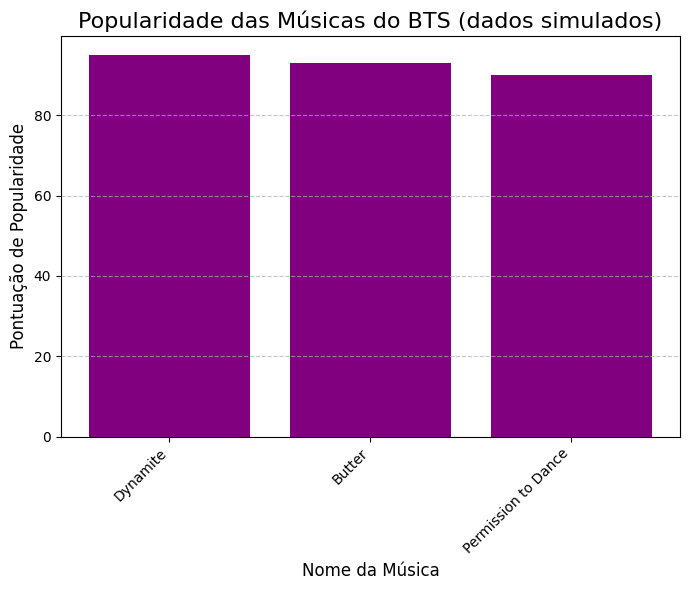

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'id': ['152l0gPz3Yd4g2J2Qv4qMv', '3t5i2h75y1b4x9r8q7l6k5', '4e1z7d3a2j1h5g6f9d8c7b'],
    'nome_musica': ['Dynamite', 'Butter', 'Permission to Dance'],
    'popularidade': [95, 93, 90],
    'duracao_ms': [199054, 185689, 219736],
    'album': ['BE', 'Butter', 'Butter'],
    'data_lancamento_album': ['2020-11-20', '2021-05-21', '2021-07-09']
}
df_top_bts = pd.DataFrame(data)

plt.figure(figsize=(7, 6))
plt.bar(df_top_bts['nome_musica'], df_top_bts['popularidade'], color='purple')

plt.title('Popularidade das Músicas do BTS (dados simulados)', fontsize=16)
plt.xlabel('Nome da Música', fontsize=12)
plt.ylabel('Pontuação de Popularidade', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('popularidade_bts.png')

plt.show()